<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_Junho_2020/blob/master/ANN_segmentacao_tensor_OUR_v15_junho_09_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import pandas as pd

In [ ]:
!pip install mahotas

In [ ]:
import mahotas.features.texture as mht
import mahotas.features

In [ ]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020

import Go2BlackWhite
import Go2Mahotas

fatal: destination path 'marquesgabi_fev_2020' already exists and is not an empty directory.
/content/marquesgabi_fev_2020


In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

In [ ]:
''''''
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado
Transfere='Fotos9Amostras720_e_varios_graos.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()


fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado


In [ ]:
#Construção da rede com as fotos já recortadas anteriormente
labels = [] #882 imagens recortadas por nós
images = [] #882 imagens lidas no formato de lista 
with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    images.append(cv2.imread(f))
    labels.append(f)


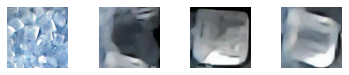

In [ ]:
# Import the 'pyplot' module of 'matplotlib'
import matplotlib.pyplot as plt

# Determine the (random) indexes of the images that you want to see 
traffic_signs = [25, 30, 36, 40]

# Fill out the subplots with the random images that you defined 
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)

plt.show()

In [ ]:
# Import the 'transform' module from 'skimage'
from skimage import transform 

# Rescale the images in the 'images' array
images28 = [transform.resize(image, (28, 28)) for image in images]

In [ ]:
# Import 'rgb2gray' from 'skimage.color'
from skimage.color import rgb2gray

# Convert 'images28' to an array
images28 = np.array(images28)

# Convert 'images28' to grayscale
images28 = rgb2gray(images28)

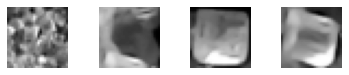

In [ ]:
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images28[traffic_signs[i]], cmap="gray")
    plt.subplots_adjust(wspace=0.5)
    
# Show the plot
plt.show()

In [ ]:
y_valor=[]

img_name=labels

Graos='G' # numero 1
Indef='I' # numero 2
Buraco='B' # numero 3
Varios='V' # numero 4

for x in img_name:
  if re.search(Graos, x):
    y_valor.append(1)
  elif re.search(Indef, x):
    y_valor.append(2)
  elif re.search(Buraco, x):
    y_valor.append(3)
  else:
    y_valor.append(4)
    
print(y_valor)
print(len(y_valor))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 3, 3, 3, 

In [ ]:
#sparse_softmax_cross_entropy_with_logits()

In [ ]:
#Define data train and data test
W_train, W_test, yw_train, yw_test = train_test_split(np.array(images28), np.array(y_valor), 
                                                    test_size=0.30, 
                                                    random_state=42)

In [ ]:
#print(len(yw_train))
#print(len(yw_test))

In [ ]:
train_images=W_train #imagens utilizadas para o treino
train_labels=yw_train # resposta da rede
test_images=W_test
test_labels=yw_test

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
20/20 [==============================] - 0s 2ms/step - loss: 1.2919 - accuracy: 0.4716
Epoch 2/10
20/20 [==============================] - 0s 2ms/step - loss: 0.9821 - accuracy: 0.5981
Epoch 3/10
20/20 [==============================] - 0s 2ms/step - loss: 0.8798 - accuracy: 0.6613
Epoch 4/10
20/20 [==============================] - 0s 2ms/step - loss: 0.8170 - accuracy: 0.6742
Epoch 5/10
20/20 [==============================] - 0s 2ms/step - loss: 0.7689 - accuracy: 0.7050
Epoch 6/10
20/20 [==============================] - 0s 2ms/step - loss: 0.6851 - accuracy: 0.7261
Epoch 7/10
20/20 [==============================] - 0s 2ms/step - loss: 0.6685 - accuracy: 0.7196
Epoch 8/10
20/20 [==============================] - 0s 2ms/step - loss: 0.6472 - accuracy: 0.7293
Epoch 9/10
20/20 [==============================] - 0s 2ms/step - loss: 0.6305 - accuracy: 0.7310
Epoch 10/10
20/20 [==============================] - 0s 2ms/step - loss: 0.6343 - accuracy: 0.7229


In [ ]:
'''
predictions = model.predict(train_images) #x_test[:3])
print('predictions shape:', predictions.shape)
'''

"\npredictions = model.predict(train_images) #x_test[:3])\nprint('predictions shape:', predictions.shape)\n"

In [ ]:
#print(predictions)
#print(train_images.shape)

In [ ]:
'''
result = model.evaluate(train_images) # esta estranho
print(result)
result = model.predict(train_images) # esta estranho
print(result)
'''

'\nresult = model.evaluate(train_images) # esta estranho\nprint(result)\nresult = model.predict(train_images) # esta estranho\nprint(result)\n'

In [ ]:
#ANN das imagens recortadas por nós
x=images28 
logits = model(x, training=False)
prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
print(prediction)

tf.Tensor(
[1 1 4 1 2 1 4 1 1 1 1 1 1 1 1 2 1 1 1 2 1 2 4 4 4 2 4 3 3 3 3 3 3 3 3 3 1
 1 1 1 1 2 1 1 1 4 4 2 2 2 2 2 1 4 2 2 1 4 4 4 1 1 3 3 2 2 2 3 3 3 3 3 1 1
 1 1 4 4 4 4 4 4 2 2 2 4 4 2 4 2 2 2 4 1 2 4 2 2 2 3 3 3 3 3 3 3 3 3 1 1 1
 2 1 2 1 4 1 1 2 2 2 4 1 2 2 2 2 2 4 4 4 1 4 4 3 3 3 3 3 3 2 3 3 3 1 2 1 1
 1 1 1 1 4 1 2 2 2 2 4 4 2 4 2 2 4 4 4 2 2 2 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 4 4 2 4 3 2 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 2 2 2 1 2 2
 2 4 2 2 2 2 4 4 4 2 3 3 3 3 3 3 2 3 3 3 1 1 1 1 1 1 1 1 1 1 2 4 4 2 2 2 2
 2 1 2 4 4 4 4 4 4 1 1 1 1 1 1 1 4 1 1 4 1 1 1 1 1 1 1 1 1 4 2 4 2 1 4 3 3
 3 4 3 3 3 3 3 3 1 2 1 1 4 4 1 2 1 4 2 2 4 2 2 2 2 2 4 4 1 4 4 2 4 4 3 3 3
 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 2 2 2 2 4 2 4 2 2 2 4 4 4 2 4 2 1 4 1 1
 1 1 1 1 1 2 1 1 1 3 1 1 1 1 1 2 4 4 4 4 4 4 3 3 3 2 3 3 3 3 3 3 1 4 1 4 4
 1 1 4 4 3 2 1 1 2 4 2 2 3 3 2 4 4 4 4 4 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 4 2 4 2 4 2 3 3 3 2 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 4 1 2 4 4 1 4
 2 2 4 4 4 4 4

In [ ]:
data = {'y_Actual': y_valor,
        'y_Predicted': prediction
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
print (df)

     y_Actual  y_Predicted
0           1            1
1           1            1
2           1            4
3           1            1
4           1            2
..        ...          ...
877         4            1
878         4            1
879         4            2
880         4            1
881         4            4

[882 rows x 2 columns]


In [ ]:
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted    1    2    3    4
Actual                       
1          310   17    2   31
2           11  115    5   49
3            1   11  163    5
4           29   30    1  102


In [ ]:
import sklearn
y_true = df['y_Actual']
y_pred = df['y_Predicted']

print(sklearn.metrics.classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           1       0.88      0.86      0.87       360
           2       0.66      0.64      0.65       180
           3       0.95      0.91      0.93       180
           4       0.55      0.63      0.58       162

    accuracy                           0.78       882
   macro avg       0.76      0.76      0.76       882
weighted avg       0.79      0.78      0.79       882



In [ ]:
# Segmentation: start here......

In [ ]:
#Start to use the big image
Size=1200 # tamanho da foto
Sub_Size=int(Size/5) # tamanho do fracionamento
Row_Crop=1/2 # posicao do corte
Crop=int(Size*Row_Crop)

In [ ]:
Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

In [ ]:
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[0]

In [ ]:
print(img.shape)

(1200, 1200)


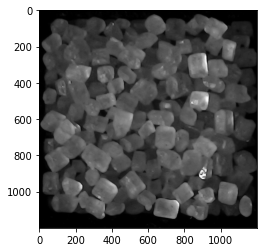

In [ ]:
plt.imshow(img, cmap = "gray")

In [ ]:
a=0
b=1200
c=100
d=200
Num=50
ww=[]
label=[]

for i in range(Num):
  #x=random.randint(a, b)
  #y=random.randint(a, b)
  #Width=random.randint(c, d)
  x=randint(a, b)
  y=randint(a, b)
  Width=randint(c, d)
  img_1st=np.zeros((Width,Width)).astype(np.int64)

  for i in range(Width):
    for j in range(Width):

      size_x=Width+x
      size_y=Width+y
    
      if(size_x>=Size):
        x=Size-Width

      if(size_y>= Size):
        y=Size-Width

      img_1st[i,j]=np.copy(img[i+y,j+x])
  ww.append(img_1st)
  nome = "W=" + str(Width)+" x="+str(x)+" y="+str(y)
  label.append(nome)


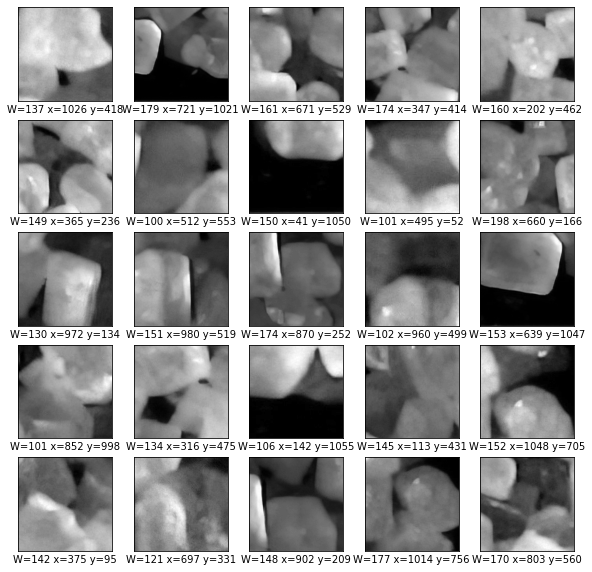

In [ ]:
Num=25
plt.figure(figsize=(10,10))
for i in range(Num):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(ww[i], cmap = "gray")
    plt.xlabel(label[i])
plt.show()


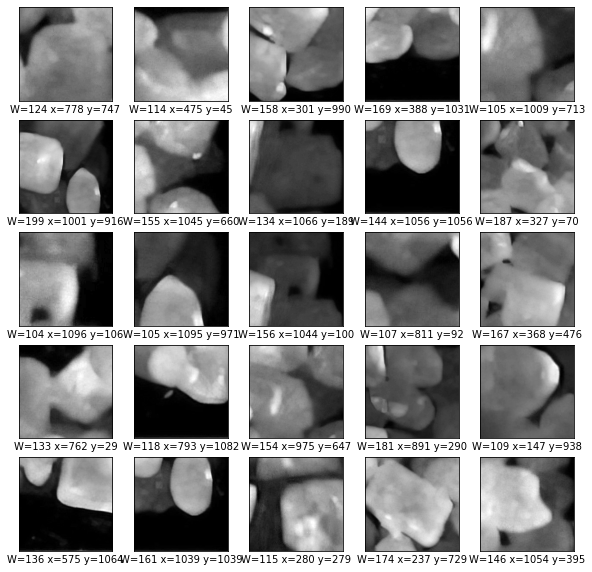

In [ ]:
Num=25
plt.figure(figsize=(10,10))
for i in range(Num):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(ww[i+25], cmap = "gray")
    plt.xlabel(label[i+25])
plt.show()

In [ ]:
print(label)

['W=137 x=1026 y=418', 'W=179 x=721 y=1021', 'W=161 x=671 y=529', 'W=174 x=347 y=414', 'W=160 x=202 y=462', 'W=149 x=365 y=236', 'W=100 x=512 y=553', 'W=150 x=41 y=1050', 'W=101 x=495 y=52', 'W=198 x=660 y=166', 'W=130 x=972 y=134', 'W=151 x=980 y=519', 'W=174 x=870 y=252', 'W=102 x=960 y=499', 'W=153 x=639 y=1047', 'W=101 x=852 y=998', 'W=134 x=316 y=475', 'W=106 x=142 y=1055', 'W=145 x=113 y=431', 'W=152 x=1048 y=705', 'W=142 x=375 y=95', 'W=121 x=697 y=331', 'W=148 x=902 y=209', 'W=177 x=1014 y=756', 'W=170 x=803 y=560', 'W=124 x=778 y=747', 'W=114 x=475 y=45', 'W=158 x=301 y=990', 'W=169 x=388 y=1031', 'W=105 x=1009 y=713', 'W=199 x=1001 y=916', 'W=155 x=1045 y=660', 'W=134 x=1066 y=189', 'W=144 x=1056 y=1056', 'W=187 x=327 y=70', 'W=104 x=1096 y=106', 'W=105 x=1095 y=971', 'W=156 x=1044 y=100', 'W=107 x=811 y=92', 'W=167 x=368 y=476', 'W=133 x=762 y=29', 'W=118 x=793 y=1082', 'W=154 x=975 y=647', 'W=181 x=891 y=290', 'W=109 x=147 y=938', 'W=136 x=575 y=1064', 'W=161 x=1039 y=1039'

In [ ]:
#img = ww[0].reshape((28,28))
#ww[0].shape
#ww[0].size

In [ ]:
print(np.array(ww[0]))

[[45 39 40 ... 26 26 26]
 [47 41 42 ... 25 26 26]
 [46 40 44 ... 24 25 24]
 ...
 [71 71 75 ... 37 36 37]
 [72 73 75 ... 38 37 37]
 [78 76 76 ... 37 37 38]]


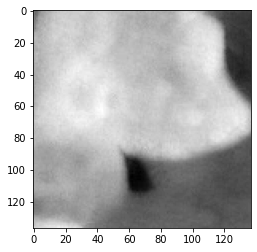

In [ ]:
plt.imshow(ww[0], cmap = "gray")

In [ ]:
Num=50
Size=28
img28_all=[]
for i in range(Num):
  data=np.array(ww[i])
  img = Image.fromarray(data.astype('uint8'), mode='L')
  img=np.float32(img)
  img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
  img28_all.append(img28)

img28_all=np.array(img28_all)
print(img28_all.shape)


(50, 28, 28)


In [ ]:
#ANN da imagem grande
x=img28_all
logits = model(x, training=False)
prediction_all = tf.argmax(logits, axis=1, output_type=tf.int32)
print(prediction_all)

tf.Tensor(
[4 4 3 4 4 3 2 3 3 2 1 4 4 2 4 1 2 4 2 4 2 4 3 1 3 2 2 4 4 4 4 3 4 2 2 4 1
 3 3 4 1 1 4 4 1 2 4 2 1 4], shape=(50,), dtype=int32)


In [ ]:
Graos='G' # numero 1
Indef='I' # numero 2
Buraco='B' # numero 3
Varios='V' # numero 4

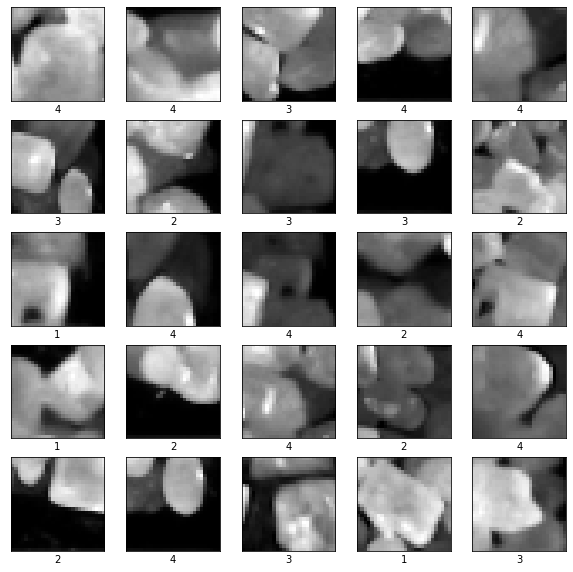

In [ ]:
Num=25
y_all=np.array(prediction_all)
plt.figure(figsize=(10,10))
for i in range(Num):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img28_all[i+25], cmap = "gray")
    label_all=y_all[i]
    plt.xlabel(label_all)
plt.show()

In [ ]:
# convert all photons in dataframe:
DF = pd.DataFrame.from_records(img28_all)

In [ ]:
#print(df)

In [ ]:
# found drive
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
# get csv file
DF=pd.DataFrame(DF)
DF.to_csv('DF.csv')

In [ ]:
# save in drive
!cp DF.csv drive/My\ Drive/Maria_Gabriela_Textura_dados_jan_2020/

In [ ]:
DF

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,"[47.803345, 61.89189, 69.66562, 73.893974, 74....","[54.781013, 65.09228, 71.52624, 74.49699, 75.6...","[59.37322, 67.79295, 73.33811, 76.15552, 76.67...","[65.49576, 68.75273, 74.69226, 75.76849, 76.07...","[65.30838, 69.07054, 73.07907, 74.35159, 76.93...","[65.420586, 68.95109, 72.642395, 74.08412, 77....","[65.202614, 68.31114, 73.629875, 75.711494, 78...","[63.933933, 68.88657, 74.36896, 77.62678, 81.7...","[63.859715, 69.98791, 74.04859, 79.678406, 83....","[64.372055, 70.45719, 75.47775, 80.61058, 82.7...","[65.54345, 72.94715, 77.09122, 80.946724, 81.4...","[67.40609, 75.93888, 79.6792, 82.53583, 83.433...","[69.64968, 76.42874, 79.89525, 83.26901, 84.49...","[72.09766, 77.53471, 79.85849, 81.84634, 84.51...","[72.68176, 75.73338, 78.834305, 80.28339, 81.3...","[68.7977, 72.7344, 75.90585, 77.78396, 78.0441...","[67.52581, 68.54547, 72.08487, 73.03815, 73.34...","[62.788425, 62.110394, 63.04571, 65.55176, 65....","[59.71954, 58.790348, 59.831158, 61.638714, 60...","[60.572853, 58.75092, 59.22036, 59.82615, 60.8...","[60.380787, 58.59017, 59.436996, 61.74506, 61....","[60.156265, 57.07331, 58.815548, 63.031647, 62...","[62.418182, 61.689007, 62.220097, 63.416, 64.7...","[59.435715, 60.38867, 60.79775, 61.455326, 62....","[49.937504, 53.155365, 55.993282, 56.041557, 5...","[47.405346, 52.184715, 54.525444, 55.13101, 55...","[58.078964, 58.45277, 60.09484, 61.11055, 59.2...","[73.08711, 74.92695, 77.6426, 77.15073, 73.437..."
1,"[57.773914, 63.517555, 68.94398, 83.72005, 96....","[57.429607, 64.39481, 68.21791, 73.21938, 85.2...","[57.85615, 61.815826, 60.493057, 60.985737, 64...","[55.412598, 54.417496, 63.02269, 63.67142, 55....","[143.35793, 149.00737, 155.89722, 174.69583, 1...","[141.30368, 142.27513, 144.9748, 161.02254, 17...","[133.7364, 137.46144, 143.64186, 154.2242, 166...","[124.83099, 127.564064, 136.01308, 147.15569, ...","[116.52941, 114.42306, 125.11781, 136.06267, 1...","[111.25687, 97.98942, 111.52973, 130.38545, 14...","[110.59124, 109.77416, 114.535904, 125.32414, ...","[108.46059, 112.77645, 121.00968, 123.11692, 1...","[107.08733, 107.12028, 116.72095, 123.126434, ...","[103.28957, 108.63784, 117.56668, 124.24956, 1...","[109.04142, 115.66106, 118.914795, 122.141975,...","[112.360725, 121.13823, 125.3126, 129.05762, 1...","[111.23462, 122.15804, 128.62209, 132.41853, 1...","[118.36941, 126.943985, 132.77925, 133.85443, ...","[127.878784, 134.05742, 136.65532, 135.85272, ...","[99.32955, 121.70881, 133.52016, 129.50655, 95...","[1.8634562, 3.5245156, 12.0563965, 14.129801, ...","[1.0213478, 1.1380107, 1.202428, 1.6256983, 1....","[0.09175743, 0.07253207, 0.02602915, 0.0943166...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.18023783, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.11709996, 0.31284916, 0.2674386, 0.40782124...","[6.163478, 5.8820887, 6.27006, 6.4809775, 5.85..."
2,"[83.939514, 88.25331, 100.587906, 112.70889, 1...","[78.78639, 82.707, 91.544426, 94.478264, 123.0...","[75.01891, 77.55199, 77.70511, 74.15502, 65.99...","[75.041595, 77.99055, 76.46125, 75.64839, 69.9...","[86.234406, 89.11532, 88.62761, 85.406425, 80....","[95.508514, 97.05105, 95.33081, 90.78639, 88.1...","[96.659744, 97.52552, 95.7259, 93.55955, 93.76...","[96.30435, 95.688095, 93.92628, 92.51607, 92.7...","[96.011345, 94.1172, 93.73346, 93.378075, 93.9...","[103.1002, 92.99433, 93.09452, 94.50851, 95.73...","[111.64083, 92.241974, 92.557655, 95.65028, 99...","[105.12666, 95.119095, 93.17391, 97.506615, 10...","[102.89792, 101.50284, 94.090744, 95.38375, 10...","[105.35538, 106.73535, 99.94329, 95.754265, 96...","[110.32704, 117.39698, 115.434784, 99.38185, 9...","[111.0605, 122.69755, 125.56333, 107.77884, 95...","[114.08318, 122.449905, 126.041595, 112.56333,...","[113.65218, 123.09262, 125.981094, 116.52553, ...","[112.32515, 115.62949, 123.81475, 122.32515, 1...","[120.87713, 123.43